In [1]:
import pandas as pd
import numpy as np
import tensorflow
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, MaxPooling2D, Flatten, Convolution2D

Using TensorFlow backend.


In [2]:
x=pd.read_csv('./datasets/fashion-mnist.csv')
#print(x)
X_= np.array(x)

X= X_[:,1:]
Y=X_[:,0]
X= X/255.0
print(X)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00392157 0.        ]
 [0.         0.00392157 0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [3]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [4]:
Xtrain=X.reshape((-1, 28,28,1))
Ytrain= np_utils.to_categorical(Y) #To have the one hot vector of Y

print(Xtrain.shape, Ytrain.shape)

(10000, 28, 28, 1) (10000, 10)


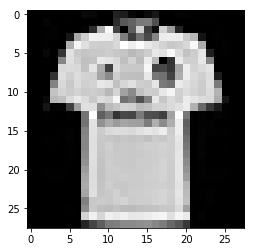

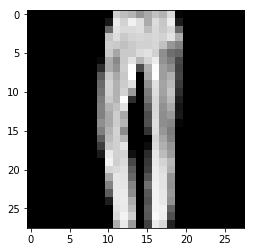

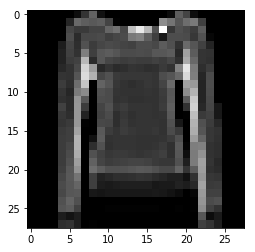

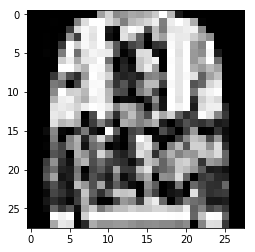

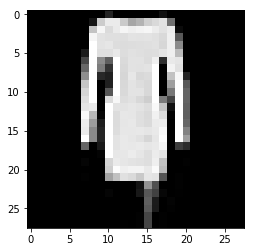

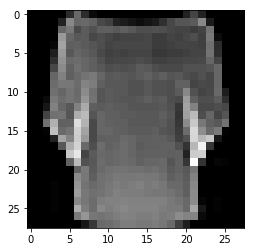

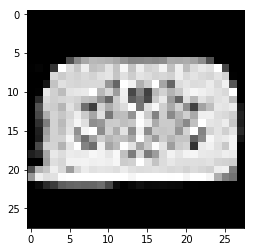

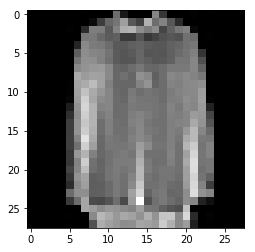

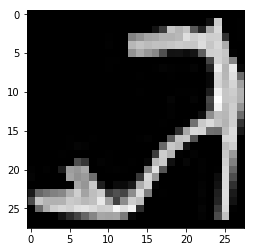

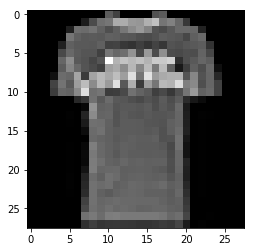

In [6]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(i)
    plt.imshow(Xtrain[i].reshape((28,28)), cmap='gray')
    plt.show()
    

In [7]:
model= Sequential()
model.add(Convolution2D(32, (3,3), activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(32, (5,5), activation="relu"))
model.add(Convolution2D(8, (5,5), activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
________________________________________________

In [8]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
hist= model.fit(x=Xtrain,
    y=Ytrain,
    batch_size=256,
    epochs=20,
    validation_split=0.20)


Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 312us/step - loss: 1.5426 - accuracy: 0.4532 - val_loss: 0.9220 - val_accuracy: 0.6935
Epoch 2/20
8000/8000 [==============================] - 1s 123us/step - loss: 0.8063 - accuracy: 0.7151 - val_loss: 0.7814 - val_accuracy: 0.7425
Epoch 3/20
8000/8000 [==============================] - 1s 124us/step - loss: 0.6754 - accuracy: 0.7467 - val_loss: 0.6729 - val_accuracy: 0.7720
Epoch 4/20
8000/8000 [==============================] - 1s 123us/step - loss: 0.5889 - accuracy: 0.7821 - val_loss: 0.6390 - val_accuracy: 0.7810
Epoch 5/20
8000/8000 [==============================] - 1s 124us/step - loss: 0.5502 - accuracy: 0.7969 - val_loss: 0.5596 - val_accuracy: 0.8115
Epoch 6/20
8000/8000 [==============================] - 1s 123us/step - loss: 0.4982 - accuracy: 0.8194 - val_loss: 0.5419 - val_accuracy: 0.8110
Epoch 7/20
8000/8000 [======

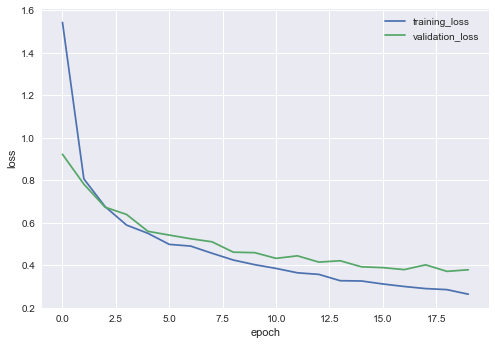

In [14]:
h=hist.history
plt.plot(h['loss'],label='training_loss')
plt.plot(h['val_loss'], label='validation_loss')
plt.style.use('seaborn')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


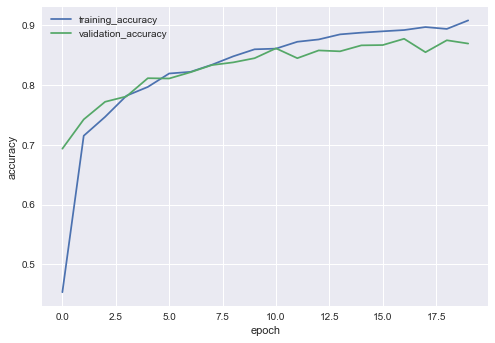

In [13]:

plt.plot(h['accuracy'],label='training_accuracy')
plt.plot(h['val_accuracy'], label='validation_accuracy')
plt.style.use('seaborn')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()